In [23]:
from scipy.stats import chi2_contingency
import pandas as pd

var1 = ['Masculino','Masculino','Masculino','Masculino','Masculino','Masculino','Feminino','Feminino','Feminino','Feminino','Feminino','Feminino']
var2 = ['Cachorro','Cachorro','Cachorro','Cachorro','Cachorro','Cachorro','Cachorro','Cachorro','Cachorro','Cachorro','Gato','Gato']

chi = pd.crosstab(var1, var2)
chi_score, p_valor, dof, expected = chi2_contingency(chi)

# chi_score: estatistica-t
# p_valor: porcentagem
# dof: graus de liberdade
# saber se as variáveis são dependentes ou não
# modelo do teste de hipóteses:
# H0 diz que não existe associação entre as variáveis (É INDEPENDENTE)
# H1 diz que existe associação entre as variáveis (É DEPENDENTE)
print("P-valor: ", p_valor)

alpha = 0.05

if p_valor < alpha:
    print("As variáveis são dependentes")
    
else:
    print("As variáveis são independentes")

P-valor:  0.4385780260809997
As variáveis são independentes


In [24]:
# formula para cálculo de tamanho de amostra para dados contínuos
def formula_amostra_continua(N, S, Z, ME):
    n = (Z**2 * S**2 * N) / ((ME**2 * (N-1)) + (Z**2 * S**2))
    return int(n)

# formula para cálculo de tamanho de amostra para dados discretos
def formula_amostra_discreta(N, Z, ME):
    n = (Z**2 * 0.25 * N) / ((ME**2 * (N-1)) + (Z**2 * 0.25))
    return int(n)

# Cálculo do tamanho mínimo da amostra
# INTERVALO DE CONFIANÇA
# 1000 ELEMENTOS
# 150 TAMANHO MÍNIMO DA AMOSTRA
# NUM INTERVALO DE CONFIANÇA DE 90%
# E COM UMA MARGEM DE ERRO DE 5%

# A AMOSTRA DISCRETA: QUANTIDADE DE PRODUTOS NO CARRINHO. PREÇO. NOME.
# A AMOSTRA CONTINUA: DADOS CUJA REPRESENTAÇÃO É INFINITA 39ºc, 39,01ºC 39,001ºC
# DISCRETIZAR A MINHA VARIÁVEL 39ºC 40ºC

N = 15 # TAMANHO DA MINHA POPULAÇÃO
# para 90% de intervalo de confiança: 1.64
# para 95% de intervalo de confiança: 1.96
# para 99% de intervalo de confiança: 2.1
Z = 1.64
# margem de erro de 1%

ME = 0.1
print(formula_amostra_discreta(N, Z, ME))

12


1. Converter os dados da planilha "Carros" em um CSV e carregá-lo no Python

In [25]:
import pandas as pd

df = pd.read_excel("Motos_Marca.xlsx", sheet_name = 1)
df.head()

df.to_csv("Marca.csv", sep = ',')

In [26]:
carro = pd.read_csv("Marca.csv", sep= ',')
carro.head() 
carro.drop(columns= 'Unnamed: 0', inplace = True) # Deletando a primeira coluna

In [27]:
carro.dropna(inplace = True)

2. Realizar teste qui quadrado com as colunas "potência motor" e "velocidade máxima". As variáveis são dependentes ou independentes? Utilizar alpha de 5%.


In [28]:
from scipy.stats import chi2_contingency
import pandas as pd

var1 = carro['Potência Motor']
var2 = carro['Velocidade máxima']

chi = pd.crosstab(var1, var2)
chi_score, p_valor, dof, expected = chi2_contingency(chi)

# chi_score: estatistica-t
# p_valor: porcentagem
# dof: graus de liberdade
# saber se as variáveis são dependentes ou não
# modelo do teste de hipóteses:
# H0 diz que não existe associação entre as variáveis (É INDEPENDENTE)
# H1 diz que existe associação entre as variáveis (É DEPENDENTE)
print("P-valor: ", p_valor)

alpha = 0.05

if p_valor < alpha:
    print("As variáveis são dependentes")
    
else:
    print("As variáveis são independentes")

P-valor:  0.0
As variáveis são dependentes


3. Calcular o tamanho mínimo da amostra para a base "Carros" com 95% de intervalo de confiança e margem de erro de 1%

In [29]:
carro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2363 entries, 0 to 2567
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Marca              2363 non-null   object 
 1   Modelo             2363 non-null   object 
 2   Comprimento        2363 non-null   int64  
 3   Carga máxima       2363 non-null   float64
 4   Cilindradas        2363 non-null   int64  
 5   Potência Motor     2363 non-null   int64  
 6   Câmbio             2363 non-null   object 
 7   Velocidade máxima  2363 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 166.1+ KB


In [30]:
# formula para cálculo de tamanho de amostra para dados contínuos
def formula_amostra_continua(N, S, Z, ME):
    n = (Z**2 * S**2 * N) / ((ME**2 * (N-1)) + (Z**2 * S**2))
    return int(n)

# formula para cálculo de tamanho de amostra para dados discretos
def formula_amostra_discreta(N, Z, ME):
    n = (Z**2 * 0.25 * N) / ((ME**2 * (N-1)) + (Z**2 * 0.25))
    return int(n)

# Cálculo do tamanho mínimo da amostra
# INTERVALO DE CONFIANÇA
# 1000 ELEMENTOS
# 150 TAMANHO MÍNIMO DA AMOSTRA
# NUM INTERVALO DE CONFIANÇA DE 90%
# E COM UMA MARGEM DE ERRO DE 5%

# A AMOSTRA DISCRETA: QUANTIDADE DE PRODUTOS NO CARRINHO. PREÇO. NOME.
# A AMOSTRA CONTINUA: DADOS CUJA REPRESENTAÇÃO É INFINITA 39ºc, 39,01ºC 39,001ºC
# DISCRETIZAR A MINHA VARIÁVEL 39ºC 40ºC

N = carro.shape[0] # TAMANHO DA MINHA POPULAÇÃO
# para 90% de intervalo de confiança: 1.64
# para 95% de intervalo de confiança: 1.96
# para 99% de intervalo de confiança: 2.1
Z = 1.96


# margem de erro de 1%
ME = 0.1
print(formula_amostra_discreta(N, Z, ME))

92


4. Faça uma análise exploratoria das variáveis Marca, Modelo, Comprimento e Carga Máxima. Somente dessas colunas.

In [31]:
print(carro['Marca'].value_counts())
print('\n')
print(carro['Modelo'].value_counts())

Marca
Audi    2097
Fiat     266
Name: count, dtype: int64


Modelo
A4           452
A3           426
A6           411
A5           150
100           99
            ... 
Linea          1
600            1
126            1
SQ7            1
Barchetta      1
Name: count, Length: 65, dtype: int64


In [32]:
print('Comprimento:\n\n',carro['Comprimento'].describe())
print('\n')
print('Carga máx:\n\n',carro['Carga máxima'].describe())


Comprimento:

 count    2363.000000
mean     4529.953872
std       343.484757
min      3054.000000
25%      4241.000000
50%      4575.000000
75%      4796.000000
max      5394.000000
Name: Comprimento, dtype: float64


Carga máx:

 count    2363.000000
mean     1997.338129
std       295.646053
min       920.000000
25%      1805.000000
50%      1985.000000
75%      2172.500000
max      3405.000000
Name: Carga máxima, dtype: float64


5. Calcular a matriz de correlação da Potência, Cilindradas e Velocidade máxma. Para cada correlação, informar se existe, se é direta ou inversa e se é fraca ou forte.

In [33]:
# corr() utiliza o Coeficiente de Pearson para determinar a correlação entre 2 variáveis
# A correlação de Pearson ela mostra um número que varia entre -1 e +1
# se o número é negativo, então a correlação é inversa
# se o número é positivo, então a correlação é direta
# se o número é entre 0 e 0.3, então não há correlação
# se o número é entre 0.3 e 0.7 então há correlação fraca
# se o número é entre 0.7 e 0.999 então há correlação forte
# se o número é 1, então há colinearidade

In [34]:
matriz_corr = carro[['Potência Motor', 'Cilindradas', 'Velocidade máxima']].corr()
print(matriz_corr)

                   Potência Motor  Cilindradas  Velocidade máxima
Potência Motor           1.000000     0.832562           0.853329
Cilindradas              0.832562     1.000000           0.666193
Velocidade máxima        0.853329     0.666193           1.000000


6. Plotar gráfico de dispersão entre Carga Máxima e Potência Motor. Fazer segundo gráfico de dispersão, mas desssa vez removendo observações, cuja carga máxima é menor do que 2000kg.

In [35]:
carro.head()

,Marca,Modelo,Comprimento,Carga máxima,Cilindradas,Potência Motor,Câmbio,Velocidade máxima
0,Audi,100,4790,1925.0,1984,115,Automático,179.0
1,Audi,100,4790,1910.0,1984,101,Manual,175.0
2,Audi,100,4790,1925.0,1984,115,Manual,184.0
3,Audi,100,4790,1970.0,2309,133,Automático,189.0
4,Audi,100,4790,1970.0,2309,133,Manual,194.0


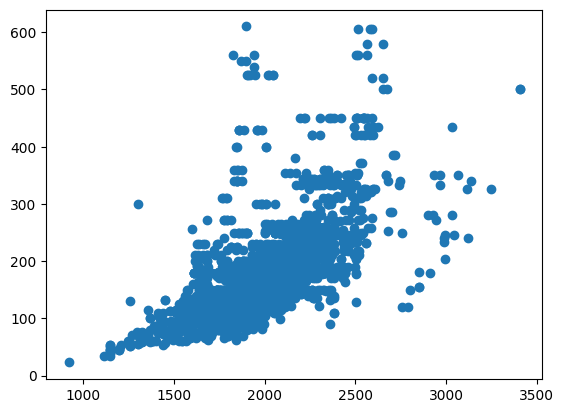

In [36]:
import matplotlib.pyplot as plt
plt.scatter(carro['Carga máxima'], carro['Potência Motor'])
# gráfico de dispersão


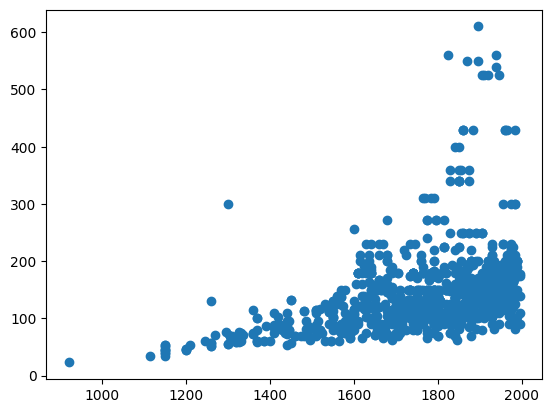

In [37]:
ndf = carro[carro['Carga máxima'] < 2000]
plt.scatter(ndf['Carga máxima'], ndf['Potência Motor'])

7. Realizar o teste de hipoteses entre Cilindradas e Velocidade Máxima. Assuma que tem normalidade e tem homocedasticidade. Assuma também que as variáveis são independentes - ttest_ind.

In [38]:
carro.head()

,Marca,Modelo,Comprimento,Carga máxima,Cilindradas,Potência Motor,Câmbio,Velocidade máxima
0,Audi,100,4790,1925.0,1984,115,Automático,179.0
1,Audi,100,4790,1910.0,1984,101,Manual,175.0
2,Audi,100,4790,1925.0,1984,115,Manual,184.0
3,Audi,100,4790,1970.0,2309,133,Automático,189.0
4,Audi,100,4790,1970.0,2309,133,Manual,194.0


In [39]:
carro.isnull().sum()

Marca                0
Modelo               0
Comprimento          0
Carga máxima         0
Cilindradas          0
Potência Motor       0
Câmbio               0
Velocidade máxima    0
dtype: int64

In [40]:
from scipy.stats import ttest_ind

# Realizando o teste t 
stat, p_valor = ttest_ind(carro['Cilindradas'], carro['Velocidade máxima'])

print('Estatísticas=%.3f, p=%.3f' % (stat, p_valor))

alpha = 0.05

if p_valor <= alpha:
    print('As médias são diferentes (rejeita H0)')
else:
    print('As médias são iguais (aceita H0)')


Estatísticas=128.881, p=0.000
As médias são diferentes (rejeita H0)
